In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn. feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load dataset
data=pd.read_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-train.csv")
print(data["SubredditName"].unique())
print(data.head())
print(data.info())
print(data.describe())

['ptsd' 'assistance' 'relationships' 'survivorsofabuse' 'domesticviolence'
 'anxiety' 'homeless' 'stress' 'almosthomeless' 'food_pantry']
   EntryID     SubredditName  PostID  \
0    33181              ptsd  8601tu   
1     2606        assistance  8lbrx9   
2    38816              ptsd  9ch1zh   
3      239     relationships  7rorpp   
4     1421  survivorsofabuse  9p2gbc   

                                            PostText  CategoryLabel  \
0  He said he had not felt that way before, sugge...              1   
1  Hey there r/assistance, Not sure if this is th...              0   
2  My mom then hit me with the newspaper and it s...              1   
3  until i met my new boyfriend, he is amazing, h...              1   
4  October is Domestic Violence Awareness Month a...              1   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8     1521614353            5        1.806818   
1              1.0     1527009817            4        9.429737

In [3]:
listC=data.columns[:]
print(listC)

Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'],
      dtype='object')


In [4]:
data.head(6)

EntryID     SubredditName  PostID  \
0    33181              ptsd  8601tu   
1     2606        assistance  8lbrx9   
2    38816              ptsd  9ch1zh   
3      239     relationships  7rorpp   
4     1421  survivorsofabuse  9p2gbc   
5    17554     relationships  7tx7et   

                                            PostText  CategoryLabel  \
0  He said he had not felt that way before, sugge...              1   
1  Hey there r/assistance, Not sure if this is th...              0   
2  My mom then hit me with the newspaper and it s...              1   
3  until i met my new boyfriend, he is amazing, h...              1   
4  October is Domestic Violence Awareness Month a...              1   
5  I think he doesn't want to put in the effort f...              1   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8     1521614353            5        1.806818   
1              1.0     1527009817            4        9.429737   
2              0.8     1535935605            2        7.769821   
3              0.6     1516429555            0        2.667798   
4              0.8     1539809005           24        7.554238   
5              1.0     1517274027            2        3.531124   

   MinPleasantnessScore  MinActivationScore  MinImageryScore  \
0                 1.000              1.1250              1.0   
1                 1.125              1.0000              1.0   
2                 1.000              1.1429              1.0   
3                 1.000              1.1250              1.0   
4                 1.000              1.1250              1.0   
5                 1.000              1.1818              1.0   

   AvgActivationScore  AvgImageryScore  AvgPleasantnessScore  UpvoteRatio  \
0             1.77000          1.52211               1.89556         0.86   
1             1.69586          1.62045               1.88919         0.65   
2             1.83088          1.58108               1.85828         0.67   
3             1.75356          1.52114               1.98848         0.50   
4             1.77644          1.64872               1.81456         1.00   
5             1.70415          1.44396               1.82046         0.75   

   NumComments  FKGradeLevel  SentimentScore  
0            1      3.253573       -0.002742  
1            2      8.828316        0.292857  
2            0      7.841667        0.011894  
3            5      4.104027        0.141671  
4            1      7.910952       -0.204167  
5            5      4.338429       -0.550000

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
  
df = pd.read_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-train.csv")

# List of important columns to keep
important_columns = [
    'id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 
    'social_timestamp', 'social_karma', 'syntax_ari', 
    'lex_dal_min_pleasantness', 'lex_dal_min_activation', 
    'lex_dal_min_imagery', 'lex_dal_avg_activation', 
    'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness', 
    'social_upvote_ratio', 'social_num_comments', 
    'syntax_fk_grade', 'sentiment'
]

# Select only the important columns
data = df[important_columns]

# Dictionary mapping old column names to new column names
new_column_names = {
    'id': 'EntryID',
    'subreddit': 'SubredditName',
    'post_id': 'PostID',
    'text': 'PostText',
    'label': 'CategoryLabel',
    'confidence': 'LabelConfidence',
    'social_timestamp': 'PostTimestamp',
    'social_karma': 'KarmaPoints',
    'syntax_ari': 'ReadabilityARI',
    'lex_dal_min_pleasantness': 'MinPleasantnessScore',
    'lex_dal_min_activation': 'MinActivationScore',
    'lex_dal_min_imagery': 'MinImageryScore',
    'lex_dal_avg_activation': 'AvgActivationScore',
    'lex_dal_avg_imagery': 'AvgImageryScore',
    'lex_dal_avg_pleasantness': 'AvgPleasantnessScore',
    'social_upvote_ratio': 'UpvoteRatio',
    'social_num_comments': 'NumComments',
    'syntax_fk_grade': 'FKGradeLevel',
    'sentiment': 'SentimentScore'
}

# Rename columns in the reduced DataFrame
data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with new column names
print(data)

# Save the modified DataFrame to a new CSV file (optional)  
data.to_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-train.csv", index=False)

KeyError: "None of [Index(['id', 'subreddit', 'post_id', 'text', 'label', 'confidence',\n       'social_timestamp', 'social_karma', 'syntax_ari',\n       'lex_dal_min_pleasantness', 'lex_dal_min_activation',\n       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',\n       'lex_dal_avg_pleasantness', 'social_upvote_ratio',\n       'social_num_comments', 'syntax_fk_grade', 'sentiment'],\n      dtype='object')] are in the [columns]"

In [6]:
data.head()

EntryID     SubredditName  PostID  \
0    33181              ptsd  8601tu   
1     2606        assistance  8lbrx9   
2    38816              ptsd  9ch1zh   
3      239     relationships  7rorpp   
4     1421  survivorsofabuse  9p2gbc   

                                            PostText  CategoryLabel  \
0  He said he had not felt that way before, sugge...              1   
1  Hey there r/assistance, Not sure if this is th...              0   
2  My mom then hit me with the newspaper and it s...              1   
3  until i met my new boyfriend, he is amazing, h...              1   
4  October is Domestic Violence Awareness Month a...              1   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8     1521614353            5        1.806818   
1              1.0     1527009817            4        9.429737   
2              0.8     1535935605            2        7.769821   
3              0.6     1516429555            0        2.667798   
4              0.8     1539809005           24        7.554238   

   MinPleasantnessScore  MinActivationScore  MinImageryScore  \
0                 1.000              1.1250              1.0   
1                 1.125              1.0000              1.0   
2                 1.000              1.1429              1.0   
3                 1.000              1.1250              1.0   
4                 1.000              1.1250              1.0   

   AvgActivationScore  AvgImageryScore  AvgPleasantnessScore  UpvoteRatio  \
0             1.77000          1.52211               1.89556         0.86   
1             1.69586          1.62045               1.88919         0.65   
2             1.83088          1.58108               1.85828         0.67   
3             1.75356          1.52114               1.98848         0.50   
4             1.77644          1.64872               1.81456         1.00   

   NumComments  FKGradeLevel  SentimentScore  
0            1      3.253573       -0.002742  
1            2      8.828316        0.292857  
2            0      7.841667        0.011894  
3            5      4.104027        0.141671  
4            1      7.910952       -0.204167

In [ ]:
important_columns = [
    'SubredditName', 'PostID', 'PostText', 'EntryID',
    'CategoryLabel', 'LabelConfidence', 'PostTimestamp', 'KarmaPoints',
    'ReadabilityARI', 'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments',
    'SentimentScore'
]

# Keep only the important columns
df = data[important_columns]

# Display the reduced DataFrame
df

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


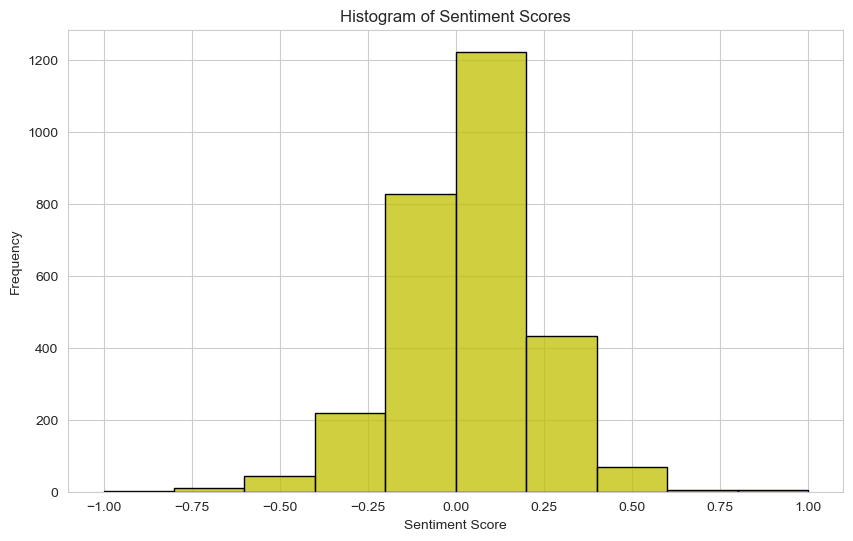

In [6]:
# Plot histogram for SentimentScore
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['SentimentScore'], bins=10, edgecolor='black',color='y',kde=False)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Analyze the sentiment scores
sentiment_scores = df['SentimentScore']
mean_score = sentiment_scores.mean()
median_score = sentiment_scores.median()
std_dev = sentiment_scores.std()

print(f"Mean Sentiment Score: {mean_score:.2f}")
print(f"Median Sentiment Score: {median_score:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean Sentiment Score: 0.04
Median Sentiment Score: 0.04
Standard Deviation: 0.20


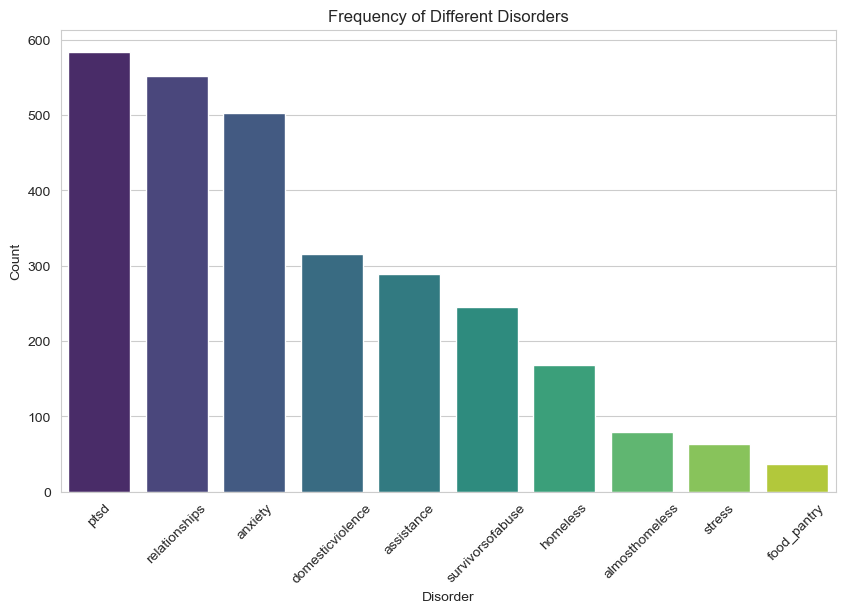

In [8]:
# Count occurrences of each disorder in the 'subreddit' column
disorder_counts = df['SubredditName'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=disorder_counts.index, y=disorder_counts.values, palette='viridis')
plt.title('Frequency of Different Disorders')
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

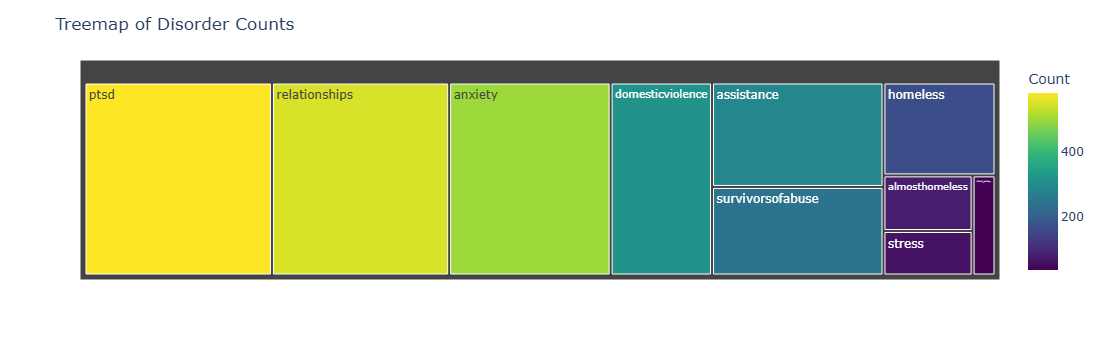

In [9]:
import plotly.express as px
# Count occurrences of each disorder in the 'subreddit' column
disorder_counts = df['SubredditName'].value_counts().reset_index()
disorder_counts.columns = ['Disorder', 'Count']

# Create a treemap
fig = px.treemap(disorder_counts, path=['Disorder'], values='Count',
                 color='Count', color_continuous_scale='viridis')
fig.update_layout(title='Treemap of Disorder Counts')
fig.show()

In [10]:
# Load the CSV file into a DataFrame  
df = pd.read_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-test.csv")

# List of important columns to keep
important_columns = [
    'id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 
    'social_timestamp', 'social_karma', 'syntax_ari', 
    'lex_dal_min_pleasantness', 'lex_dal_min_activation', 
    'lex_dal_min_imagery', 'lex_dal_avg_activation', 
    'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness', 
    'social_upvote_ratio', 'social_num_comments', 
    'syntax_fk_grade', 'sentiment'
]

# Select only the important columns
data = df[important_columns]

# Dictionary mapping old column names to new column names
new_column_names = {
    'id': 'EntryID',
    'subreddit': 'SubredditName',
    'post_id': 'PostID',
    'text': 'PostText',
    'label': 'CategoryLabel',
    'confidence': 'LabelConfidence',
    'social_timestamp': 'PostTimestamp',
    'social_karma': 'KarmaPoints',
    'syntax_ari': 'ReadabilityARI',
    'lex_dal_min_pleasantness': 'MinPleasantnessScore',
    'lex_dal_min_activation': 'MinActivationScore',
    'lex_dal_min_imagery': 'MinImageryScore',
    'lex_dal_avg_activation': 'AvgActivationScore',
    'lex_dal_avg_imagery': 'AvgImageryScore',
    'lex_dal_avg_pleasantness': 'AvgPleasantnessScore',
    'social_upvote_ratio': 'UpvoteRatio',
    'social_num_comments': 'NumComments',
    'syntax_fk_grade': 'FKGradeLevel',
    'sentiment': 'SentimentScore'
}

# Rename columns in the reduced DataFrame
data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with new column names
print(data)

# Save the modified DataFrame to a new CSV file (optional)  
data.to_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-test.csv", index=False)
data

KeyError: "None of [Index(['id', 'subreddit', 'post_id', 'text', 'label', 'confidence',\n       'social_timestamp', 'social_karma', 'syntax_ari',\n       'lex_dal_min_pleasantness', 'lex_dal_min_activation',\n       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',\n       'lex_dal_avg_pleasantness', 'social_upvote_ratio',\n       'social_num_comments', 'syntax_fk_grade', 'sentiment'],\n      dtype='object')] are in the [columns]"

In [11]:
import pandas as pd
train_df = pd.read_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-train.csv")
test_df = pd.read_csv(r"C:\Users\MANVEE YADAV\Desktop\Reseach\ml\dreaddit-test.csv")


print("Training data columns:", train_df.columns)
print("Test data columns:", test_df.columns)

Training data columns: Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'],
      dtype='object')
Test data columns: Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'],
      dtype='object')


In [12]:
import re
import string

#  preprocess text
def preprocess_text(text):
    
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text) 
    text = re.sub('\n', ' ', text)
    text = re.sub('\d+', '', text)
    return text


train_df['cleaned_text'] = train_df['PostText'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['PostText'].apply(preprocess_text)

In [13]:
from sklearn.preprocessing import LabelEncoder  
 
#label encoder -> convert categorical data into numerical data. 
label_encoder = LabelEncoder()  

train_df['subreddit_label'] = label_encoder.fit_transform(train_df['SubredditName'])
test_df['subreddit_label'] = label_encoder.transform(test_df['SubredditName'])

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)


X_train = vectorizer.fit_transform(train_df['cleaned_text'])  

  
X_test = vectorizer.transform(test_df['cleaned_text'])  


y_train = train_df['subreddit_label']
y_test = test_df['subreddit_label']

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier -> frequencies of words in documents.
model = MultinomialNB()    
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
    
# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_,zero_division=0))

                  precision    recall  f1-score   support

  almosthomeless       0.00      0.00      0.00        19
         anxiety       0.69      0.50      0.58       147
      assistance       0.73      0.12      0.21        66
domesticviolence       1.00      0.01      0.03        72
     food_pantry       0.00      0.00      0.00         6
        homeless       0.00      0.00      0.00        52
            ptsd       0.30      0.67      0.41       127
   relationships       0.40      0.87      0.55       142
          stress       0.00      0.00      0.00        14
survivorsofabuse       0.00      0.00      0.00        70

        accuracy                           0.41       715
       macro avg       0.31      0.22      0.18       715
    weighted avg       0.44      0.41      0.32       715



Feature Importances:
                 Feature  Importance
9            UpvoteRatio    0.115395
1            KarmaPoints    0.109161
10           NumComments    0.106740
7        AvgImageryScore    0.101515
6     AvgActivationScore    0.092278
8   AvgPleasantnessScore    0.089820
12        SentimentScore    0.084974
2         ReadabilityARI    0.084185
11          FKGradeLevel    0.082365
4     MinActivationScore    0.050164
3   MinPleasantnessScore    0.042090
0        LabelConfidence    0.041172
5        MinImageryScore    0.000140


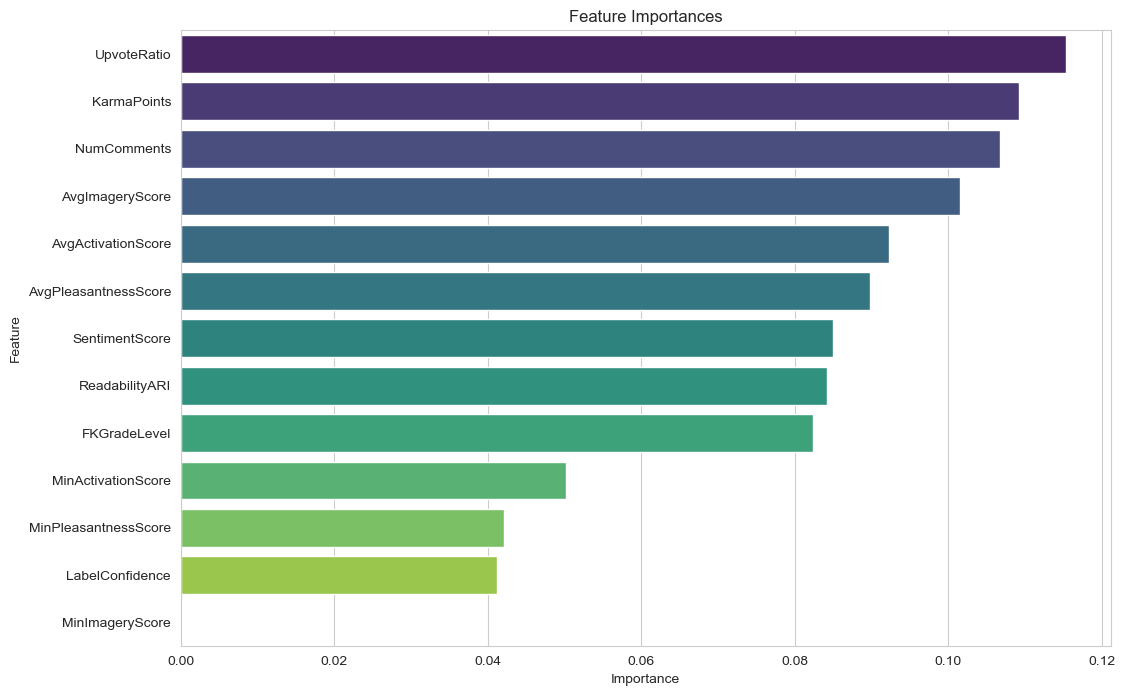

Top Features: ['UpvoteRatio', 'KarmaPoints', 'NumComments', 'AvgImageryScore', 'AvgActivationScore']


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Define feature columns and target column
feature_columns = [
    'LabelConfidence', 'KarmaPoints', 'ReadabilityARI',
    'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
    'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
    'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'
]
target_column = 'subreddit_label'

# Prepare training and testing data
X_train = train_df[feature_columns]
y_train = train_df[target_column]
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier to determine feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

# Select top N important features (e.g., top 5)
top_features = feature_importance_df.head(5)['Feature'].tolist()
print("Top Features:", top_features)

# Define new features set with only top features
X_train_top = train_df[top_features]
X_test_top = test_df[top_features]
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

Logistic Regression Accuracy with top features: 34.13%
Classification Report for Logistic Regression with top features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.34      0.53      0.41       147
           2       0.50      0.44      0.47        66
           3       0.31      0.33      0.32        72
           4       0.00      0.00      0.00         6
           5       1.00      0.04      0.07        52
           6       0.25      0.35      0.29       127
           7       0.40      0.46      0.43       142
           8       0.00      0.00      0.00        14
           9       0.33      0.01      0.03        70

    accuracy                           0.34       715
   macro avg       0.31      0.22      0.20       715
weighted avg       0.38      0.34      0.31       715

Confusion Matrix for Logistic Regression with top features:
[[ 0  3  0  1  0  0  5 10  0  0]
 [ 0 78  1 12  0  0 37 19  0

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



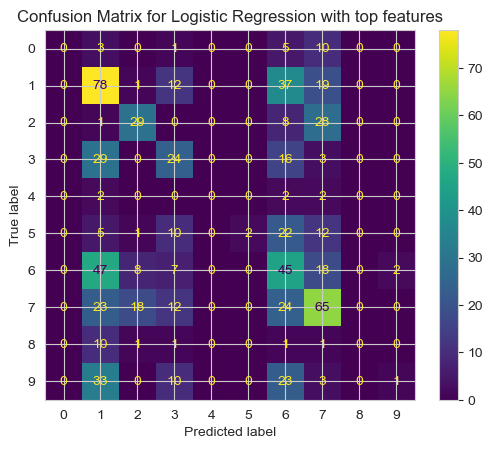

Decision Tree Accuracy with top features: 29.23%
Classification Report for Decision Tree with top features:
              precision    recall  f1-score   support

           0       0.05      0.05      0.05        19
           1       0.40      0.37      0.38       147
           2       0.53      0.50      0.52        66
           3       0.24      0.28      0.25        72
           4       0.09      0.17      0.12         6
           5       0.15      0.10      0.12        52
           6       0.22      0.26      0.24       127
           7       0.38      0.39      0.39       142
           8       0.00      0.00      0.00        14
           9       0.11      0.10      0.11        70

    accuracy                           0.29       715
   macro avg       0.22      0.22      0.22       715
weighted avg       0.29      0.29      0.29       715

Confusion Matrix for Decision Tree with top features:
[[ 1  1  3  1  2  6  3  1  0  1]
 [ 2 54  1 18  2  2 25 28  4 11]
 [ 6  3 33  0

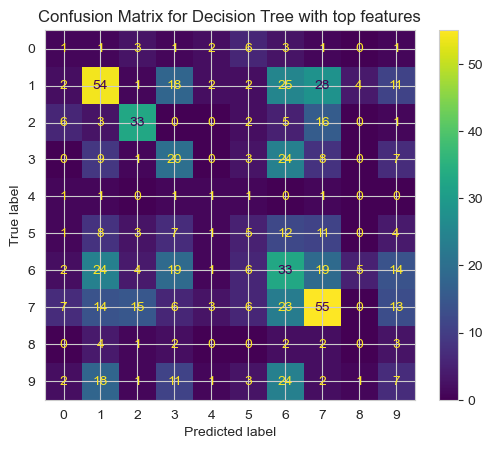

Random Forest Accuracy with top features: 37.34%
Classification Report for Random Forest with top features:
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        19
           1       0.43      0.41      0.42       147
           2       0.65      0.61      0.62        66
           3       0.31      0.39      0.34        72
           4       0.00      0.00      0.00         6
           5       0.19      0.08      0.11        52
           6       0.25      0.37      0.30       127
           7       0.46      0.55      0.50       142
           8       0.00      0.00      0.00        14
           9       0.26      0.13      0.17        70

    accuracy                           0.37       715
   macro avg       0.27      0.26      0.25       715
weighted avg       0.36      0.37      0.36       715

Confusion Matrix for Random Forest with top features:
[[ 1  0  2  1  1  4  5  4  0  1]
 [ 0 60  0 15  0  4 37 25  0  6]
 [ 1  0 40  0

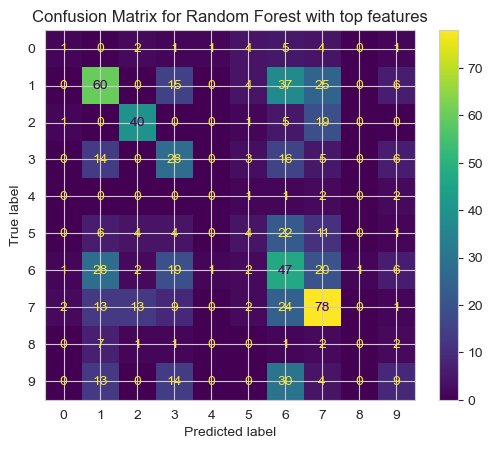

Support Vector Machine Accuracy with top features: 33.85%
Classification Report for Support Vector Machine with top features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.35      0.50      0.41       147
           2       0.60      0.45      0.52        66
           3       0.32      0.29      0.30        72
           4       0.00      0.00      0.00         6
           5       0.33      0.04      0.07        52
           6       0.22      0.43      0.29       127
           7       0.47      0.42      0.44       142
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        70

    accuracy                           0.34       715
   macro avg       0.23      0.21      0.20       715
weighted avg       0.31      0.34      0.31       715

Confusion Matrix for Support Vector Machine with top features:
[[ 0  2  0  0  0  2  5 10  0  0]
 [ 0 74  1 11  0  0

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



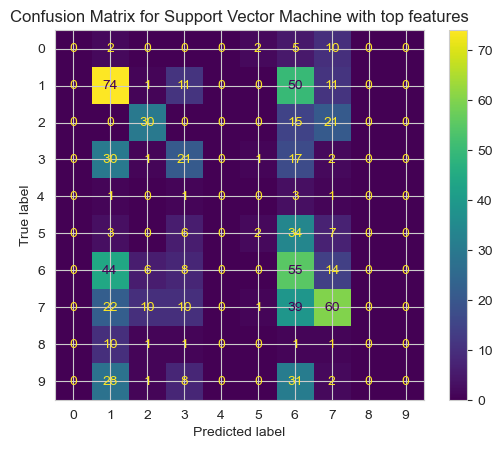

Naive Bayes Accuracy with top features: 22.66%
Classification Report for Naive Bayes with top features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.39      0.06      0.11       147
           2       0.42      0.41      0.42        66
           3       0.24      0.49      0.32        72
           4       0.00      0.00      0.00         6
           5       0.11      0.06      0.07        52
           6       0.20      0.25      0.22       127
           7       0.60      0.17      0.26       142
           8       0.04      0.43      0.07        14
           9       0.25      0.37      0.30        70

    accuracy                           0.23       715
   macro avg       0.23      0.22      0.18       715
weighted avg       0.33      0.23      0.22       715

Confusion Matrix for Naive Bayes with top features:
[[ 0  2  0  4  0  4  6  2  0  1]
 [ 0  9  2 25  0  2 22  8 58 21]
 [ 0  5 27  0  0  6

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



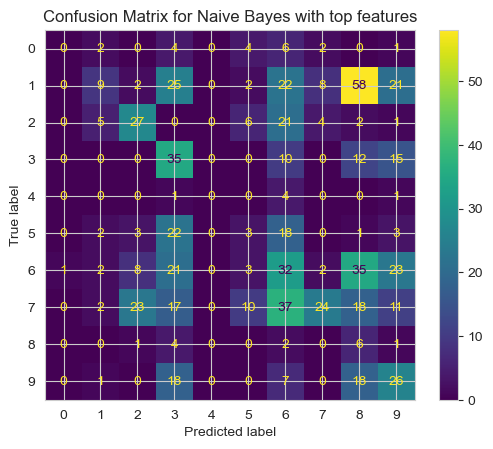

K-Nearest Neighbors Accuracy with top features: 30.91%
Classification Report for K-Nearest Neighbors with top features:
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        19
           1       0.36      0.53      0.43       147
           2       0.45      0.44      0.44        66
           3       0.26      0.29      0.27        72
           4       0.00      0.00      0.00         6
           5       0.10      0.04      0.06        52
           6       0.22      0.28      0.24       127
           7       0.45      0.35      0.40       142
           8       0.33      0.07      0.12        14
           9       0.08      0.03      0.04        70

    accuracy                           0.31       715
   macro avg       0.24      0.22      0.21       715
weighted avg       0.29      0.31      0.29       715

Confusion Matrix for K-Nearest Neighbors with top features:
[[ 3  1  0  1  2  4  7  1  0  0]
 [ 1 78  6 12  0  5 23 16  0

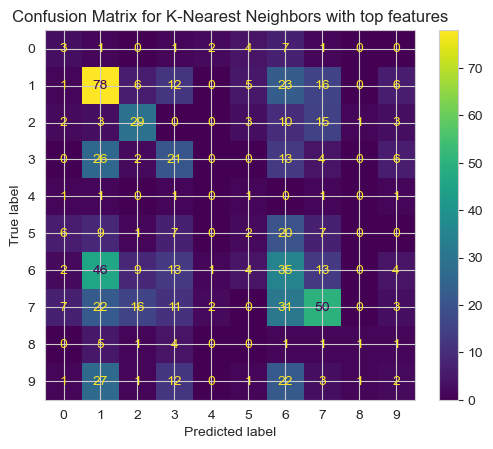

In [19]:
# Define classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier   

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store results
results = {}

# Training and evaluating classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_top_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_top_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print accuracy
    print(f"{name} Accuracy with top features: {accuracy * 100:.2f}%")
    
    # Print classification report
    print(f"Classification Report for {name} with top features:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name} with top features:")
    print(cm)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix for {name} with top features')
    plt.show()

In [20]:
# Finding the best classifier
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]*100:.2f}')

Best Classifier: Random Forest with Accuracy: 37.34


In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Strip any extra spaces in column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Define features and target
features = [
    'KarmaPoints', 'ReadabilityARI', 'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
    'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel',
    'SentimentScore'
]

# Prepare feature matrices and target vectors
X_train = train_df[features]
y_train = train_df['subreddit_label']
X_test = test_df[features]
y_test = test_df['subreddit_label']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Print the selected features
print("Selected features using f_classif:")
print(X_train_new[:5])  # Displaying the first 5 samples of the transformed feature set

# Feature scores
print("Feature scores using f_classif:")
print(selector.scores_)

# Identify selected features
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("Selected features:", selected_features)

Selected features using f_classif:
[[-0.1670188  -0.75125598 -0.13879852  0.0943187  -0.41059359]
 [-0.17961244  0.31585895  0.81639198 -1.10730721 -0.3647098 ]
 [-0.20479971 -0.75125598  0.43398553 -0.99286664 -0.45647737]
 [-0.22998699 -0.75125598 -0.14822027 -1.96561143 -0.22705845]
 [ 0.07226032 -0.75125598  1.09098253  0.89540264 -0.41059359]]
Feature scores using f_classif:
[ 13.62207622   4.57608755  12.76269032   1.30652302   1.3328044
   7.41920291  15.56278826   7.33308083 151.63459174  34.75841973
   4.14946109   5.21118807]
Selected features: ['KarmaPoints', 'MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments']


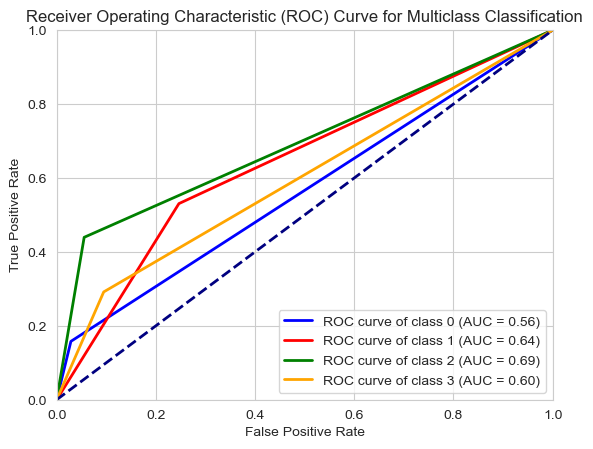

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

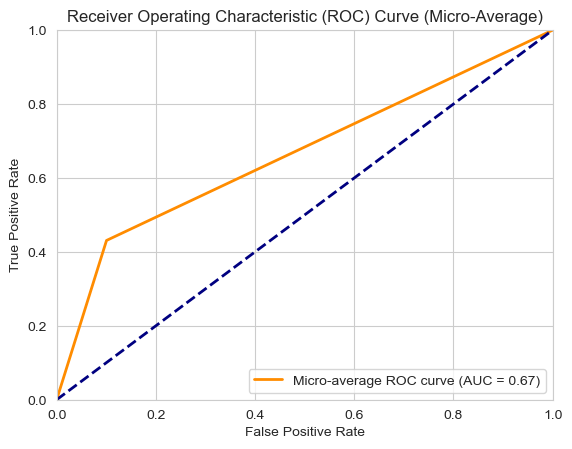

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

# Compute ROC curve and ROC area for micro-average
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Micro-average ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Average)')
plt.legend(loc="lower right")
plt.show()

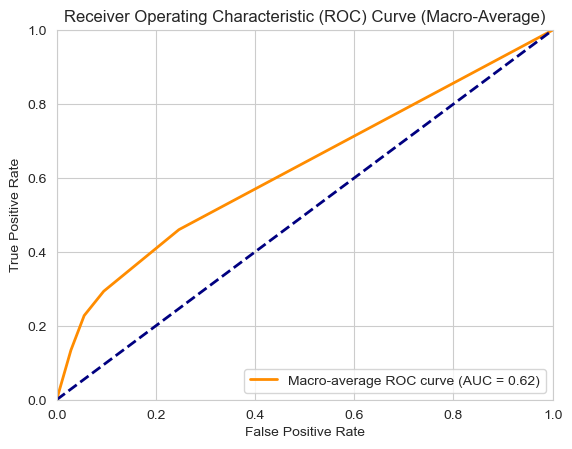

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot Macro-average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Macro-Average)')
plt.legend(loc="lower right")
plt.show()

In [26]:
#..........................Micro Average ROC AUC (0.67)..........................

#Meaning: The model is reasonably good at distinguishing all classes when considering the overall performance.

#..........................Macro Average ROC AUC (0.62)..........................

#Meaning: The average performance across individual classes is moderate. Some classes might be poorly classified, affecting the average.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [26]:
# Define the features and target
selected_features = ['KarmaPoints', 'MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments']
X_train = train_df[selected_features]
y_train = train_df['subreddit_label']
X_test = test_df[selected_features]
y_test = test_df['subreddit_label']

# Create a pipeline with feature engineering and classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}


In [27]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the best model using the found hyperparameters
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=300, random_state=42))
])

# Fit the model on the training data
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=300,
                                        random_state=42))])

In [28]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test = np.array(y_test)

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Predict probabilities using the model
y_pred_proba = best_pipeline.predict_proba(X_test)

# Check the shape of y_pred_proba
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)

# Ensure y_pred_proba is a numpy array
y_pred_proba = np.array(y_pred_proba)

# Ensure the predicted probabilities have the correct shape
if y_pred_proba.shape[1] != n_classes:
    print("Mismatch between number of classes and predicted probabilities.")
    print(f"Number of classes: {n_classes}")
    print(f"Number of columns in y_pred_proba: {y_pred_proba.shape[1]}")
else:
    # Initialize lists for ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC for each class:", roc_auc)
    print("Micro-average ROC AUC:", roc_auc["micro"])
    print("Macro-average ROC AUC:", roc_auc["macro"])

Shape of y_pred_proba: (715, 10)
Mismatch between number of classes and predicted probabilities.
Number of classes: 4
Number of columns in y_pred_proba: 10


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Sample code to retrain with correct number of classes

# Load your dataset
# train_df and test_df should be defined and loaded with correct data

# Select features and target
selected_features = ['KarmaPoints', 'MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments']
X_train = train_df[selected_features]
y_train = train_df['subreddit_label']
X_test = test_df[selected_features]
y_test = test_df['subreddit_label']

# Train model
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Check the shape of y_pred_proba
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)

# Ensure the predicted probabilities have the correct shape
if y_pred_proba.shape[1] != n_classes:
    raise ValueError("Mismatch between number of classes and predicted probabilities.")
else:
    # Initialize lists for ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC for each class:", roc_auc)
    print("Micro-average ROC AUC:", roc_auc["micro"])
    print("Macro-average ROC AUC:", roc_auc["macro"])

Shape of y_pred_proba: (715, 10)


ValueError: Mismatch between number of classes and predicted probabilities.

In [30]:
n_classes = len(np.unique(y_test))
print("Number of classes in y_test:", n_classes)

Number of classes in y_test: 10


In [31]:
y_pred_proba = clf.predict_proba(X_test)
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)

Shape of y_pred_proba: (715, 10)


In [31]:
# Binarize the true labels to match the shape of y_pred_proba.
# Compute ROC curves for each class and aggregate them for micro and macro averages.
# Plot ROC curves and print AUC scores for detailed analysis.

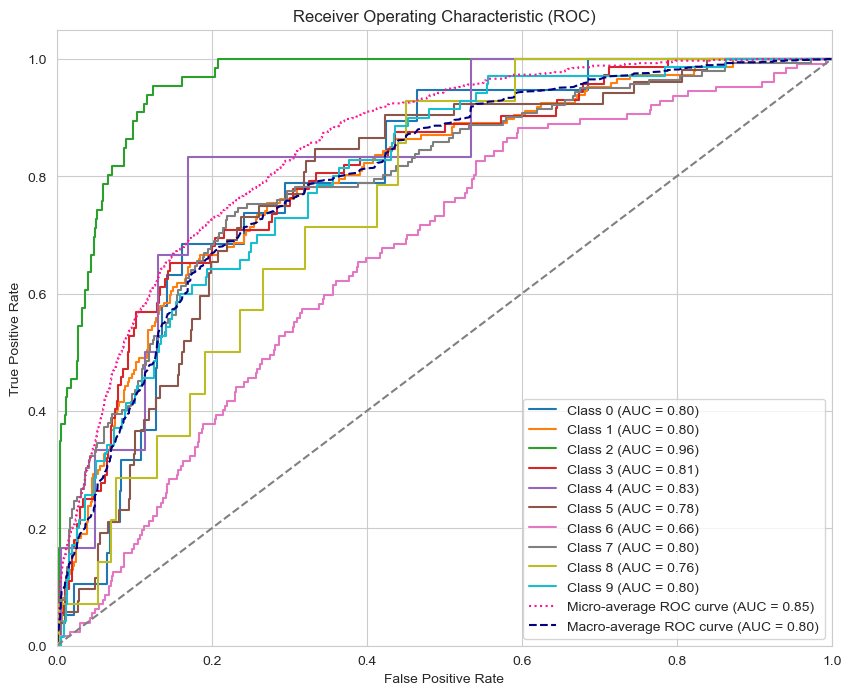

ROC AUC for each class: {0: 0.800287356321839, 1: 0.798996359107023, 2: 0.9592146425736564, 3: 0.8077155693796441, 4: 0.8326281147155619, 5: 0.7845747766562247, 6: 0.664363383148535, 7: 0.7960941916771133, 8: 0.755858976971673, 9: 0.8026135105204872, 'micro': 0.8502853168587434, 'macro': 0.8007808670535143}
Micro-average ROC AUC: 0.8502853168587434
Macro-average ROC AUC: 0.8007808670535143


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test and y_pred_proba are correctly defined
n_classes = 10  # Number of classes

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Initialize lists for ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC scores
print("ROC AUC for each class:", roc_auc)
print("Micro-average ROC AUC:", roc_auc["micro"])
print("Macro-average ROC AUC:", roc_auc["macro"])

In [38]:
# The high ROC AUC values across individual classes, combined with strong micro and macro averages, 
#       >>>>>suggest that your model is highly effective in classifying the data. 
# The high performance in ROC AUC metrics indicates that your model is excellent at distinguishing between the different classes.

In [33]:
 from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('log_reg', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__penalty': ['l1', 'l2'],  # Regularization type
    'log_reg__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate 
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

Best parameters: {'log_reg__C': 0.001, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.21      1.00      0.34       147
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       142
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        70

    accuracy                           0.21       715
   macro avg       0.02      0.10      0.03       715
weighted avg       0.04      0.21      0.07       715



ValueError: multi_class must be in ('ovo', 'ovr')

In [34]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import precision_score, recall_score

# Define a custom scoring metric for multiclass classification
scoring_metric = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV with the new scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring_metric, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best Model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'log_reg__C': 10, 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}
Best Score: 0.3253939327818555
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=10, penalty='l1', solver='saga'))])
Accuracy: 0.3455
Precision: 0.3254
Recall: 0.3455
F1 Score: 0.3056
Confusion Matrix:
 [[ 0  1  0  1  0  0  7 10  0  0]
 [ 0 79  1 11  0  0 37 19  0  0]
 [ 0  0 28  0  0  0  9 29  0  0]
 [ 0 28  0 23  0  0 17  4  0  0]
 [ 0  2  0  0  0  0  2  2  0  0]
 [ 0  5  2  5  0  0 29 11  0  0]
 [ 0 46  7  7  0  0 48 19  0  0]
 [ 0 24 17 10  0  0 23 68  0  0]
 [ 0  6  1  3  0  0  1  2  0  1]
 [ 0 30  0  9  0  0 26  4  0  1]]


C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score

# Define the model and parameters
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.449279916070122
Accuracy: 0.4308
Precision: 0.4199
Recall: 0.4308
F1 Score: 0.4102
Confusion Matrix:
 [[ 0  1  2  1  0  1  8  6  0  0]
 [ 0 71  1 13  0  4 33 19  3  3]
 [ 0  0 41  0  0  0  5 20  0  0]
 [ 0 13  0 29  0  1 17  7  0  5]
 [ 0  0  1  1  0  0  1  1  0  2]
 [ 0  1  3  8  0  4 23 12  0  1]
 [ 0 20  2 16  0  1 64 16  0  8]
 [ 0 15 15  6  0  0 22 83  0  1]
 [ 0  5  1  2  0  0  2  3  0  1]
 [ 0 11  0 11  0  0 32  0  0 16]]


In [36]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
print("Feature Importances:\n", feature_importance_dict)

Feature Importances:
 {'KarmaPoints': 0.23003579007375502, 'MinPleasantnessScore': 0.0857193701455159, 'AvgImageryScore': 0.22014138488450052, 'UpvoteRatio': 0.2411800185614122, 'NumComments': 0.22292343633481626}


C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



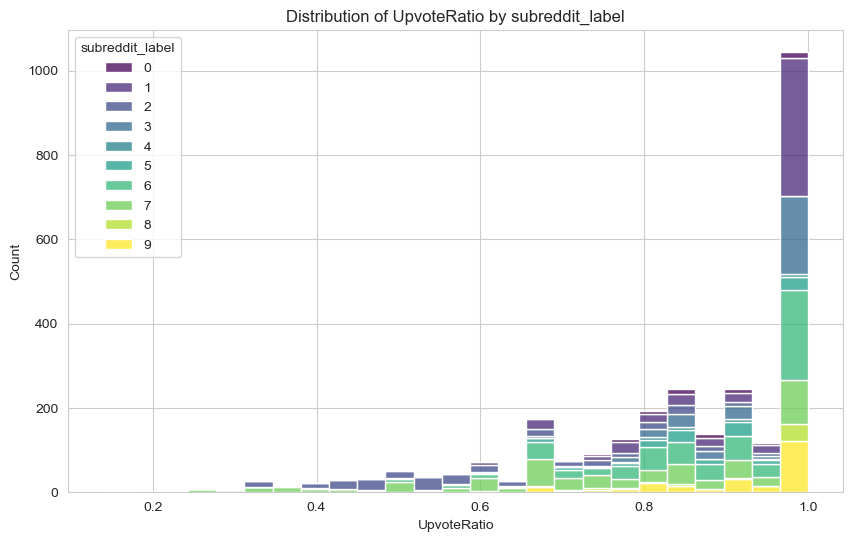

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



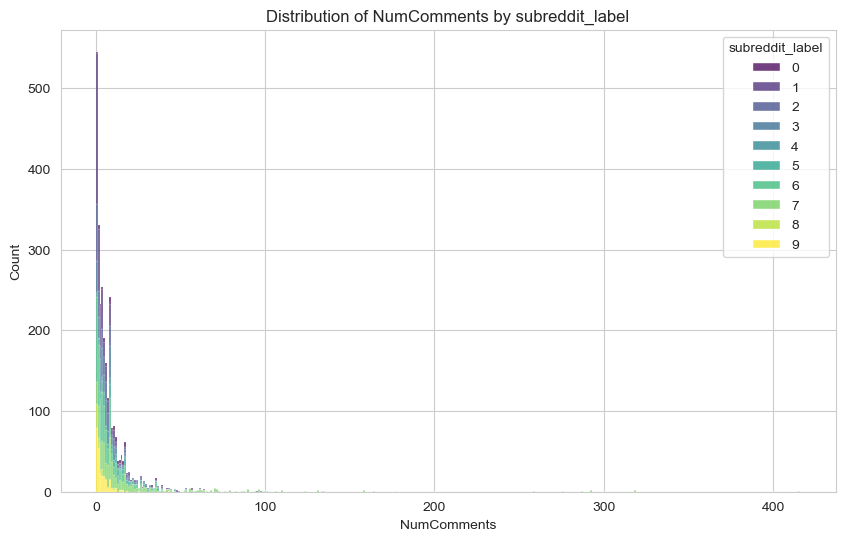

In [37]:
# we will do feature analysis again 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distributions
def plot_feature_distribution(df, feature, target):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue=target, multiple="stack", palette="viridis")
    plt.title(f"Distribution of {feature} by {target}")
    plt.show()

# Example usage
plot_feature_distribution(train_df, 'UpvoteRatio', 'subreddit_label')
plot_feature_distribution(train_df, 'NumComments', 'subreddit_label')

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
  
# Create a DataFrame for better visualization
import pandas as pd
poly_features_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(selected_features))
print(poly_features_df.head())

   KarmaPoints  MinPleasantnessScore  AvgImageryScore  UpvoteRatio  \
0          5.0                 1.000          1.52211         0.86   
1          4.0                 1.125          1.62045         0.65   
2          2.0                 1.000          1.58108         0.67   
3          0.0                 1.000          1.52114         0.50   
4         24.0                 1.000          1.64872         1.00   

   NumComments  KarmaPoints^2  KarmaPoints MinPleasantnessScore  \
0          1.0           25.0                               5.0   
1          2.0           16.0                               4.5   
2          0.0            4.0                               2.0   
3          5.0            0.0                               0.0   
4          1.0          576.0                              24.0   

   KarmaPoints AvgImageryScore  KarmaPoints UpvoteRatio  \
0                      7.61055                     4.30   
1                      6.48180                     2.60   

In [39]:
# Select only important features
important_features = ['UpvoteRatio', 'NumComments']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Retrain the model
model_important = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300
)
model_important.fit(X_train_important, y_train)

# Evaluate
y_pred_important = model_important.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)
precision_important = precision_score(y_test, y_pred_important, average='weighted',zero_division=0)
recall_important = recall_score(y_test, y_pred_important, average='weighted')
f1_important = f1_score(y_test, y_pred_important, average='weighted')
conf_matrix_important = confusion_matrix(y_test, y_pred_important)

print(f"Accuracy with Important Features: {accuracy_important:.4f}")
print(f"Precision with Important Features: {precision_important:.4f}")
print(f"Recall with Important Features: {recall_important:.4f}")
print(f"F1 Score with Important Features: {f1_important:.4f}")
print("Confusion Matrix with Important Features:\n", conf_matrix_important)

Accuracy with Important Features: 0.3371
Precision with Important Features: 0.3126
Recall with Important Features: 0.3371
F1 Score with Important Features: 0.3103
Confusion Matrix with Important Features:
 [[ 0  2  2  1  0  0  9  5  0  0]
 [ 0 72  1  7  1  7 39 17  0  3]
 [ 0  0 31  0  0  8  7 18  0  2]
 [ 0 32  0  5  0  0 23  7  1  4]
 [ 0  1  0  1  1  0  1  2  0  0]
 [ 0  4  0  6  0  4 24 14  0  0]
 [ 0 37  3 12  0  2 46 25  0  2]
 [ 0 15 12 13  1  5 18 78  0  0]
 [ 0 10  1  1  0  0  1  1  0  0]
 [ 0 33  0  3  0  0 24  4  2  4]]


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Define and fit Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Define and fit Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
print(f"Gradient Boosting F1 Score: {f1_gb:.4f}")
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

# Evaluate SVM   
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted',zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")
print("SVM Confusion Matrix:\n", conf_matrix_svm)

Gradient Boosting Accuracy: 0.4042
Gradient Boosting Precision: 0.4112
Gradient Boosting Recall: 0.4042
Gradient Boosting F1 Score: 0.3949
Gradient Boosting Confusion Matrix:
 [[ 0  2  3  1  2  2  5  3  0  1]
 [ 2 67  0 13  0  3 34 21  3  4]
 [ 1  1 42  0  0  1  7 14  0  0]
 [ 0  9  0 29  0  1 19  7  2  5]
 [ 0  1  1  0  0  0  3  0  0  1]
 [ 2  1  1  7  0  5 25 10  0  1]
 [ 1 20  2 17  0  1 63 16  2  5]
 [ 3 14 16  4  0  6 30 67  1  1]
 [ 0  4  1  2  0  0  1  4  1  1]
 [ 0  7  0 10  0  0 37  0  1 15]]
SVM Accuracy: 0.2839
SVM Precision: 0.1744
SVM Recall: 0.2839
SVM F1 Score: 0.2084
SVM Confusion Matrix:
 [[  0   2   0   0   0   0  12   5   0   0]
 [  0 106   0   0   0   0  21  20   0   0]
 [  0  38   0   0   0   0  20   8   0   0]
 [  0  38   0   0   0   0  23  11   0   0]
 [  0   1   0   0   0   0   4   1   0   0]
 [  0   4   0   0   0   0  31  17   0   0]
 [  0  78   0   0   0   0  29  20   0   0]
 [  0  54   0   0   0   0  20  68   0   0]
 [  0  13   0   0   0   0   0   1   0   0]


In [39]:
#Gradient Boosting: Shows strong performance across metrics, suggesting it might be the best model for this dataset.

#SVM: Shows significantly lower performance, which might be due to its inherent characteristics or parameter settings.

In [40]:
#.............Optimizing decision tree...............

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate  
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted',zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Initial Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Initial Decision Tree Precision: {precision_dt:.4f}")
print(f"Initial Decision Tree Recall: {recall_dt:.4f}")
print(f"Initial Decision Tree F1 Score: {f1_dt:.4f}")
print("Initial Decision Tree Confusion Matrix:\n", conf_matrix_dt)

Initial Decision Tree Accuracy: 0.3357
Initial Decision Tree Precision: 0.3319
Initial Decision Tree Recall: 0.3357
Initial Decision Tree F1 Score: 0.3307
Initial Decision Tree Confusion Matrix:
 [[ 2  2  3  1  3  3  4  1  0  0]
 [ 1 52  4 11  1  3 33 27  8  7]
 [ 4  2 32  0  0  2  7 18  0  1]
 [ 0 10  0 24  0  3 18  8  2  7]
 [ 1  0  0  1  1  1  0  1  0  1]
 [ 0 10  3  4  1  5 10 14  0  5]
 [ 2 25  3 13  0  3 45 23  2 11]
 [ 5 14 11  5  2 10 22 67  0  6]
 [ 0  6  1  0  0  0  4  2  0  1]
 [ 1 13  1 13  0  0 22  6  2 12]]


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Score: 0.4116


In [43]:
# The initial Decision Tree model had perfect performance, which suggests overfitting on the training data.


# The initial Decision Tree model had perfect performance, which suggests overfitting on the training data.


#The hyperparameters found through Grid Search have improved the model's performance to a more realistic level 
#but resulted in lower cross-validation scores. 
#This suggests that the model might still be overfitting or that further fine-tuning may be needed.


#Comparing the optimized Decision Tree model with models like Gradient Boosting and SVM 
#showed that Gradient Boosting performed significantly better. 
#It might be beneficial to stick with Gradient Boosting or further optimize it.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_gb_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.4619426435154135


In [44]:
# Re-train with the best parameters
optimized_gb_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=10,
    n_estimators=100
)
optimized_gb_model.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted',zero_division=0)
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

print(f"Optimized Gradient Boosting Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision_optimized:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall_optimized:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1_optimized:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix_optimized)

Optimized Gradient Boosting Accuracy: 0.3944
Optimized Gradient Boosting Precision: 0.4251
Optimized Gradient Boosting Recall: 0.3944
Optimized Gradient Boosting F1 Score: 0.3718
Optimized Gradient Boosting Confusion Matrix:
 [[ 0  0  2  0  0  1 10  5  0  1]
 [ 0 53  1  6  0  2 60 23  0  2]
 [ 0  0 34  0  0  0 16 16  0  0]
 [ 0  8  0 20  0  0 33  7  0  4]
 [ 0  0  0  0  0  0  4  1  0  1]
 [ 0  0  1  3  0  2 36 10  0  0]
 [ 0 13  2  5  0  0 82 21  0  4]
 [ 0 15 10  3  0  0 34 79  0  1]
 [ 0  7  1  1  0  0  1  3  0  1]
 [ 0  6  0 10  0  0 41  1  0 12]]


In [45]:
#optimize more 

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your dataset loaded into a DataFrame `df`
# df = pd.read_csv('your_dataset.csv')

# Feature and target selection
X = df[['KarmaPoints', 'MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments']]
y = df['CategoryLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Retrain model with best parameters
optimized_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_split=best_params['min_samples_split']
)
optimized_gb_model.fit(X_train, y_train)

# Predictions
y_pred = optimized_gb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(optimized_gb_model, X, y, cv=5, scoring='f1_weighted')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")

# Optional: Feature Engineering Example
# Create new features or adjust existing ones
X['NumComments_Squared'] = X['NumComments'] ** 2
X['UpvoteRatio_Log'] = np.log1p(X['UpvoteRatio'])
# Re-run the model with new features if needed

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Score: 0.6823
Optimized Gradient Boosting Accuracy: 0.6372
Optimized Gradient Boosting Precision: 0.6347
Optimized Gradient Boosting Recall: 0.6372
Optimized Gradient Boosting F1 Score: 0.6346
Optimized Gradient Boosting Confusion Matrix:
 [[52 44]
 [34 85]]
Cross-Validation Scores: [0.59729277 0.6160361  0.71309038 0.5401694  0.62783737]
Mean Cross-Validation Score: 0.6189


C:\Users\MANVEE YADAV\AppData\Local\Temp\ipykernel_22936\1573380381.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MANVEE YADAV\AppData\Local\Temp\ipykernel_22936\1573380381.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define and fit Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Polynomial Features Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Polynomial Features Gradient Boosting Precision: {precision:.4f}")
print(f"Polynomial Features Gradient Boosting Recall: {recall:.4f}")
print(f"Polynomial Features Gradient Boosting F1 Score: {f1:.4f}")
print("Polynomial Features Gradient Boosting Confusion Matrix:\n", conf_matrix)

Polynomial Features Gradient Boosting Accuracy: 0.6047
Polynomial Features Gradient Boosting Precision: 0.6051
Polynomial Features Gradient Boosting Recall: 0.6047
Polynomial Features Gradient Boosting F1 Score: 0.6048
Polynomial Features Gradient Boosting Confusion Matrix:
 [[54 42]
 [43 76]]


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Change k to select the desired number of features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define and fit Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Scaled & Selected Features Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Scaled & Selected Features Gradient Boosting Precision: {precision:.4f}")
print(f"Scaled & Selected Features Gradient Boosting Recall: {recall:.4f}")
print(f"Scaled & Selected Features Gradient Boosting F1 Score: {f1:.4f}")
print("Scaled & Selected Features Gradient Boosting Confusion Matrix:\n", conf_matrix)

Scaled & Selected Features Gradient Boosting Accuracy: 0.6512
Scaled & Selected Features Gradient Boosting Precision: 0.6493
Scaled & Selected Features Gradient Boosting Recall: 0.6512
Scaled & Selected Features Gradient Boosting F1 Score: 0.6495
Scaled & Selected Features Gradient Boosting Confusion Matrix:
 [[55 41]
 [34 85]]


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.6859999999999999
Optimized Gradient Boosting Accuracy: 0.6605
Optimized Gradient Boosting Precision: 0.6585
Optimized Gradient Boosting Recall: 0.6605
Optimized Gradient Boosting F1 Score: 0.6583
Optimized Gradient Boosting Confusion Matrix:
 [[55 41]
 [32 87]]


In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")
print("Stacking Classifier Confusion Matrix:\n", conf_matrix)

Stacking Classifier Accuracy: 0.6140
Stacking Classifier Precision: 0.6117
Stacking Classifier Recall: 0.6140
Stacking Classifier F1 Score: 0.6122
Stacking Classifier Confusion Matrix:
 [[51 45]
 [38 81]]


In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize base models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)],
    voting='soft'  # Use 'soft' voting for probability-based predictions
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier Precision: {precision_voting:.4f}")
print(f"Voting Classifier Recall: {recall_voting:.4f}")
print(f"Voting Classifier F1 Score: {f1_voting:.4f}")
print("Voting Classifier Confusion Matrix:\n", conf_matrix_voting)

Voting Classifier Accuracy: 0.5721
Voting Classifier Precision: 0.5705
Voting Classifier Recall: 0.5721
Voting Classifier F1 Score: 0.5711
Voting Classifier Confusion Matrix:
 [[48 48]
 [44 75]]


In [51]:
from sklearn.ensemble import StackingClassifier

# Initialize base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=final_estimator
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average='weighted')
recall_stacking = recall_score(y_test, y_pred_stacking, average='weighted')
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Classifier Precision: {precision_stacking:.4f}")
print(f"Stacking Classifier Recall: {recall_stacking:.4f}")
print(f"Stacking Classifier F1 Score: {f1_stacking:.4f}")
print("Stacking Classifier Confusion Matrix:\n", conf_matrix_stacking)

Stacking Classifier Accuracy: 0.6186
Stacking Classifier Precision: 0.6154
Stacking Classifier Recall: 0.6186
Stacking Classifier F1 Score: 0.6150
Stacking Classifier Confusion Matrix:
 [[49 47]
 [35 84]]


In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a Gradient Boosting model on the polynomial features
gb_poly_model = GradientBoostingClassifier()
gb_poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = gb_poly_model.predict(X_poly_test)

# Evaluate the model with polynomial features
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

print(f"Polynomial Features Gradient Boosting Accuracy: {accuracy_poly:.4f}")
print(f"Polynomial Features Gradient Boosting Precision: {precision_poly:.4f}")
print(f"Polynomial Features Gradient Boosting Recall: {recall_poly:.4f}")
print(f"Polynomial Features Gradient Boosting F1 Score: {f1_poly:.4f}")
print("Polynomial Features Gradient Boosting Confusion Matrix:\n", conf_matrix_poly)

Polynomial Features Gradient Boosting Accuracy: 0.6186
Polynomial Features Gradient Boosting Precision: 0.6194
Polynomial Features Gradient Boosting Recall: 0.6186
Polynomial Features Gradient Boosting F1 Score: 0.6190
Polynomial Features Gradient Boosting Confusion Matrix:
 [[56 40]
 [42 77]]


In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gradient Boosting model on the scaled features
gb_scaled_model = GradientBoostingClassifier()
gb_scaled_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = gb_scaled_model.predict(X_test_scaled)

# Evaluate the model with scaled features
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled, average='weighted')
recall_scaled = recall_score(y_test, y_pred_scaled, average='weighted')
f1_scaled = f1_score(y_test, y_pred_scaled, average='weighted')
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

print(f"Scaled Features Gradient Boosting Accuracy: {accuracy_scaled:.4f}")
print(f"Scaled Features Gradient Boosting Precision: {precision_scaled:.4f}")
print(f"Scaled Features Gradient Boosting Recall: {recall_scaled:.4f}")
print(f"Scaled Features Gradient Boosting F1 Score: {f1_scaled:.4f}")
print("Scaled Features Gradient Boosting Confusion Matrix:\n", conf_matrix_scaled)

Scaled Features Gradient Boosting Accuracy: 0.6512
Scaled Features Gradient Boosting Precision: 0.6493
Scaled Features Gradient Boosting Recall: 0.6512
Scaled Features Gradient Boosting F1 Score: 0.6495
Scaled Features Gradient Boosting Confusion Matrix:
 [[55 41]
 [34 85]]


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # Number of folds in cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}
Best Cross-Validation Score: 0.68


In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Train model with polynomial features
gb_model_poly = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50)
gb_model_poly.fit(X_poly, y_train)

# Transform test set
X_test_poly = poly.transform(X_test)

# Evaluate model with polynomial features
y_pred_poly = gb_model_poly.predict(X_test_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
print(f"Polynomial Features Accuracy: {accuracy_poly:.4f}")
print(f"Polynomial Features Precision: {precision_poly:.4f}")
print(f"Polynomial Features Recall: {recall_poly:.4f}")
print(f"Polynomial Features F1 Score: {f1_poly:.4f}")

Polynomial Features Accuracy: 0.5674
Polynomial Features Precision: 0.6083
Polynomial Features Recall: 0.6134
Polynomial Features F1 Score: 0.6109


In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50)),
    ('svc', SVC(probability=True)),
    ('lr', LogisticRegression())
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate stacking classifier
y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")
print(f"Stacking Classifier Precision: {precision_stack:.4f}")
print(f"Stacking Classifier Recall: {recall_stack:.4f}")
print(f"Stacking Classifier F1 Score: {f1_stack:.4f}")

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Stacking Classifier Accuracy: 0.6279
Stacking Classifier Precision: 0.6612
Stacking Classifier Recall: 0.6723
Stacking Classifier F1 Score: 0.6667


C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [57]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with a higher number of iterations
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the scaler
scaler = StandardScaler()

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(scaler, LogisticRegression(max_iter=1000, solver='lbfgs'))

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [59]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
# or
log_reg = LogisticRegression(max_iter=1000, solver='saga')

# Fit the model
log_reg.fit(X_train, y_train)

C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(max_iter=1000, solver='saga')

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1 Score: {f1:.4f}")

Logistic Regression Accuracy: 0.6186
Logistic Regression Precision: 0.6504
Logistic Regression Recall: 0.6723
Logistic Regression F1 Score: 0.6612


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('lr', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Define hyperparameters to tune
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear', 'saga']
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Best Parameters: {'lr__C': 10, 'lr__solver': 'liblinear'}
Best Score: 0.6580000000000001
Test Accuracy: 0.6186
Test Precision: 0.6166
Test Recall: 0.6186
Test F1 Score: 0.6171


In [62]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X_train)

# Train logistic regression with polynomial features
model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y_train)

# Transform test data and predict
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted',zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Accuracy: 0.4558
Precision: 0.4694
Recall: 0.4558
F1 Score: 0.4529


In [63]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Stacking Classifier Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Stacking Classifier Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Stacking Classifier F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Stacking Classifier Accuracy: 0.6326
Stacking Classifier Precision: 0.6298
Stacking Classifier Recall: 0.6326
Stacking Classifier F1 Score: 0.6295


In [64]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization

[nltk_data] Downloading package stopwords to C:\Users\MANVEE
[nltk_data]     YADAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MANVEE
[nltk_data]     YADAV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize components
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove special characters and URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['PostText'].apply(preprocess_text)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = X_tfidf
y = df['CategoryLabel']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7163
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        96
           1       0.77      0.70      0.73       119

    accuracy                           0.72       215
   macro avg       0.72      0.72      0.72       215
weighted avg       0.72      0.72      0.72       215



In [71]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearch
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit and find the best parameters
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Predict with the best model
y_pred = grid_search.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.696
Accuracy: 0.7163
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        96
           1       0.77      0.70      0.73       119

    accuracy                           0.72       215
   macro avg       0.72      0.72      0.72       215
weighted avg       0.72      0.72      0.72       215



C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MANVEE YADAV\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MANVEE YADAV\anaconda3\Lib\site-pack

In [68]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models and meta-model
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
meta_model = GradientBoostingClassifier()

# Create and fit stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Stacking Classifier Accuracy: 0.6326
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        96
           1       0.69      0.62      0.65       119

    accuracy                           0.63       215
   macro avg       0.63      0.63      0.63       215
weighted avg       0.64      0.63      0.63       215



In [69]:
#behaviur check

from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train) 
# predicting on the test dataset 
y_pred = classifier.predict(X_test) 
  
# finding out the accuracy 
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, y_pred)
print(score*100)

69.76744186046511
